In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def stats(arr):
    print("Mean: " , np.mean(arr))
    print("Median: ", np.median(arr))
    print("Std Dev:" , np.std(arr))
    print("Max: " , max(arr))
    print("Min: " , min(arr))

In [5]:
%%time
sf_data = pd.read_csv("/scratch/public/kushk/sf_with_homeloc_one_tweet_per_day.csv")
sf_data = sf_data[~sf_data["home_tract"].isna()]
sf_data = sf_data[~sf_data["tract"].isna()]

CPU times: user 1min 35s, sys: 5.87 s, total: 1min 41s
Wall time: 1min 41s


In [6]:
sf_data.head()

,Unnamed: 0,sf_with_homeloc.csv,u_id,lat,lon,date,tract,home_tract,time,calDate
0,0,2.117882e-293,1.112537e-308,37.423851,-122.196872,2012-07-26T00:49:46Z,6.081613e+09,6.085509e+09,00:49:46,2012-07-26
1,1,2.117950e-293,1.112537e-308,38.674385,-121.342140,2012-07-26T00:50:45Z,6.067008e+09,6.067008e+09,00:50:45,2012-07-26
2,2,2.117956e-293,1.112537e-308,38.393944,-121.968185,2012-07-26T00:50:50Z,6.095253e+09,6.095253e+09,00:50:50,2012-07-26
3,3,2.117963e-293,1.112537e-308,37.694860,-122.484290,2012-07-26T00:50:56Z,6.081601e+09,6.081603e+09,00:50:56,2012-07-26
4,4,2.117966e-293,1.112537e-308,37.325984,-121.896728,2012-07-26T00:50:58Z,6.085501e+09,6.085501e+09,00:50:58,2012-07-26


In [7]:
len(sf_data)

14585347

In [8]:
data = sf_data.groupby(["u_id"]).size()

Mean:  143.2393518291186
Median:  76.0
Std Dev: 294.114127617148
Max:  47852
Min:  11


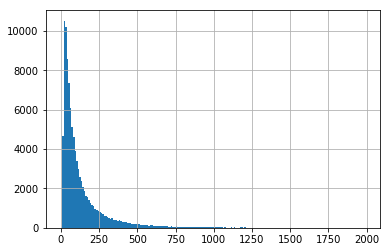

In [9]:
data.hist(bins= range(0,2000, 10))
stats(data)

In [10]:
sum(data[data > data.quantile(0.9)]) / sum(data)

0.4268818561533024

## Group tweets by UserId/Tract combo count

In [11]:
users = sf_data.groupby(["u_id" , "tract"]).size().reset_index().rename(columns={0:'count'})

In [12]:
users.head()

,u_id,tract,count
0,1.112537e-308,6.001401e+09,1
1,1.112537e-308,6.001402e+09,1
2,1.112537e-308,6.013349e+09,1
3,1.112537e-308,6.041121e+09,1
4,1.112537e-308,6.041124e+09,1


In [13]:
#read in neighbor dataset
nn_data = pd.read_csv("/scratch/public/kushk/neighbor_new.csv")
nn_data.head()

,OBJECTID,SRC_GEOID,NBR_GEOID,LENGTH,NODE_COUNT
0,1,6001400100,6001404300,11.573519,0
1,2,6001400100,6001404400,4424.829004,0
2,3,6001400100,6001421600,477.810686,0
3,4,6001400100,6001422600,1282.939498,0
4,5,6001400100,6001422700,553.272576,0


In [14]:
tracts = list(set(nn_data["SRC_GEOID"]))

In [15]:
means = []
medians = []
sds = []
percentOverFive = []

for tract in tracts:
    one_tract = users[users["tract"] == tract]
    if(len(one_tract) > 0):
        means.append(np.mean(one_tract["count"]))
        medians.append(np.median(one_tract["count"]))
        sds.append(np.std((one_tract["count"])))
        percentOverFive.append(sum(one_tract["count"] > 5) / len(one_tract["count"]))
    else:
        means.append(0)
        medians.append(0)
        sds.append(0)
        percentOverFive.append(0)

In [16]:
output = pd.DataFrame({"Tract" : list(tracts) , "Mean User Tweets" : means,  "Median User Tweets" : medians,  "Mean STD DEV" : sds, "Percent over five" : percentOverFive} , )

In [17]:
output.to_csv("User_analysis_output_oneday.csv")

In [18]:
users.to_csv("users_new_oneday.csv")

In [19]:
output.head()

,Mean STD DEV,Mean User Tweets,Median User Tweets,Percent over five,Tract
0,16.118561,5.187097,1.0,0.144086,6067003400
1,7.231254,2.255157,1.0,0.048317,6013354001
2,10.864635,3.312263,1.0,0.093552,6013354002
3,21.326406,6.136317,1.0,0.156663,6095251803
4,29.540961,10.165217,1.0,0.213043,6095251804


In [20]:
cols = output.columns.tolist()
cols = cols[::-1]
output = output[cols]
output.head()

,Tract,Percent over five,Median User Tweets,Mean User Tweets,Mean STD DEV
0,6067003400,0.144086,1.0,5.187097,16.118561
1,6013354001,0.048317,1.0,2.255157,7.231254
2,6013354002,0.093552,1.0,3.312263,10.864635
3,6095251803,0.156663,1.0,6.136317,21.326406
4,6095251804,0.213043,1.0,10.165217,29.540961


## Histogram of Mean user tweets by tract - Limited range [0,120]

Mean:  5.480398026453314
Median:  4.9302132132132135
Std Dev: 2.327557910451644
Max:  24.659685863874344
Min:  0.0


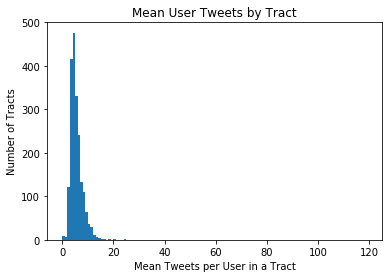

In [21]:
plt.hist(output["Mean User Tweets"] , bins = range(120))
plt.xlabel("Mean Tweets per User in a Tract")
plt.ylabel("Number of Tracts")
plt.title("Mean User Tweets by Tract")
stats(output["Mean User Tweets"])

## Histogram of Median User Tweets by Tract

Mean:  1.0823323323323324
Median:  1.0
Std Dev: 0.32164673523595805
Max:  6.0
Min:  0.0


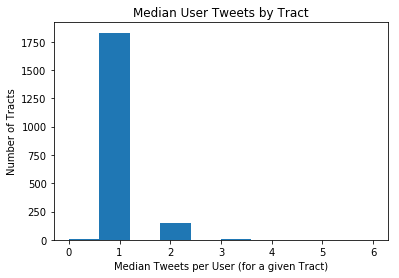

In [22]:
plt.hist(output["Median User Tweets"])
plt.xlabel("Median Tweets per User (for a given Tract)")
plt.ylabel("Number of Tracts")
plt.title("Median User Tweets by Tract")
stats(output["Median User Tweets"])

## Histogram of Tweets per User - limited from [0,60]

Mean:  4.876054544986509
Median:  1.0
Std Dev: 16.909005869664554
Max:  1032
Min:  1


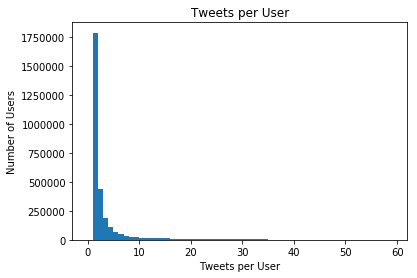

In [23]:
plt.hist(users["count"] , bins=range(60))
plt.xlabel("Tweets per User")
plt.ylabel("Number of Users")
plt.title("Tweets per User")
stats(users["count"])

## Histogram of Percent of Users above 5 tweets in a tract

Mean:  0.14276993690772993
Median:  0.1341373052559493
Std Dev: 0.057759221925155126
Max:  0.5071054599850411
Min:  0.0


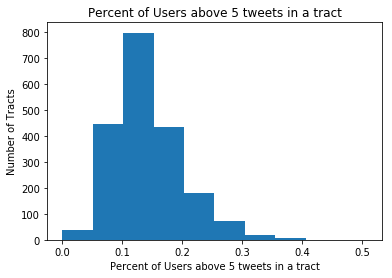

In [24]:
plt.hist(output["Percent over five"])
plt.xlabel("Percent of Users above 5 tweets in a tract")
plt.ylabel("Number of Tracts")
plt.title("Percent of Users above 5 tweets in a tract")
stats(output["Percent over five"])